##Build a model to recognize disease in Tomato

**1.Load the data from gdrive to colab and unzip it**

**2.Become one with data(Data Preprocessing)**

**3.Build a VGG-16 model that we done before on Apple disease prediction tensorflow nn model**

**4.Train the model on the Tomato image dataset and choose the better model**

**4.Evaluate and Visualize the predictions**

---


**Step1.**
Load the Tomata plant disease data from google drive and unzip the file

---

In [13]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [14]:
from zipfile import ZipFile
zip_ref=ZipFile('/gdrive/MyDrive/Toma.zip')
zip_ref.extractall()
zip_ref.close()

**Step2.** Become one with data and preprocess the *Toma* image dataset

---

In [15]:
import os
import shutil
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

*Get the number of directories and images on the Toma folder*


In [4]:
for directory_path,directory_name,file_names in os.walk("Toma"):
  print(f"There are {len(directory_name)} directories and {len(file_names)} images are in :{directory_path}")

There are 3 directories and 1 images are in :Toma
There are 0 directories and 16 images are in :Toma/test
There are 10 directories and 0 images are in :Toma/train
There are 0 directories and 1851 images are in :Toma/train/Tomato___Late_blight
There are 0 directories and 1882 images are in :Toma/train/Tomato___Leaf_Mold
There are 0 directories and 1961 images are in :Toma/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus
There are 0 directories and 1926 images are in :Toma/train/Tomato___healthy
There are 0 directories and 1702 images are in :Toma/train/Tomato___Bacterial_spot
There are 0 directories and 1745 images are in :Toma/train/Tomato___Septoria_leaf_spot
There are 0 directories and 1920 images are in :Toma/train/Tomato___Early_blight
There are 0 directories and 1827 images are in :Toma/train/Tomato___Target_Spot
There are 0 directories and 1790 images are in :Toma/train/Tomato___Tomato_mosaic_virus
There are 0 directories and 1741 images are in :Toma/train/Tomato___Spider_mites Two-s

Visualize some random images from selected folder


In [5]:
def visualize_image(path,disease):
  if(disease!='.DS_Store'):
    rand_img=np.random.choice(os.listdir(os.path.join(path,disease)))
    image=mpimg.imread(os.path.join(path,disease,rand_img))
    plt.figure(figsize=(8,6))
    plt.imshow(image)
    print(image.shape)
    plt.gca().invert_yaxis()
    color="red"
    #Green text for healthy plant and red for diseased plant
    if(disease=="Tomato___healthy"):color="green"
    plt.title(disease,fontsize=15,color=color)

(256, 256, 3)


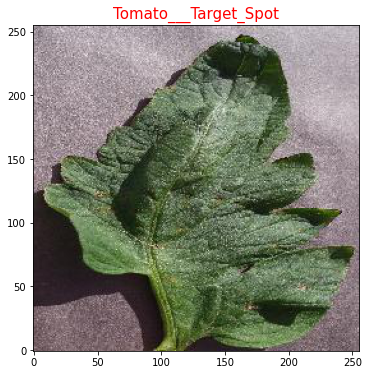

In [6]:
Random_image=np.random.choice(os.listdir("Toma/train/"))
visualize_image("Toma/train/",Random_image) 

**First train the VGG-16 architecture model with non-augmented data and check the performance**

In [6]:
#Normalize the data using ImageDataGeneator
traindata_gen=ImageDataGenerator(rescale=1/255.)
valdata_gen=ImageDataGenerator(rescale=1/255.)

In [7]:
''' 
Mapping our training and validation data to the ImageDataGenerator instance and using the function flow_from_directory
we define our taret_size,class_mode and batch_size
'''

traindata=traindata_gen.flow_from_directory("Toma/train",
                                            target_size=(256,256),
                                            class_mode="categorical",
                                            batch_size=32)
validdata=valdata_gen.flow_from_directory("Toma/valid",
                                         target_size=(256,256),
                                         class_mode="categorical",
                                         batch_size=32)

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


**Step3.**


Use VGG-16 architecture to build the model

In [9]:
'''The above VGG-16 model is a pretty complex model that can genaralize 1000 classes 
but we have only 4 classes(labels) on out Apple disease data
'''

model2=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,input_shape=(256,256,3),activation="relu"),
    tf.keras.layers.Conv2D(32,3,activation="relu",strides=2),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu"),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu",strides=2),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation="relu"),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation="relu",strides=2),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")

])
history=model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [10]:
early_stop=EarlyStopping(monitor='val_loss',patience=3,verbose=1)

model2.fit(traindata, steps_per_epoch=len(traindata),epochs=20,
           validation_data=validdata,
           validation_steps=len(validdata),callbacks=[early_stop])

Epoch 1/20
574/574 [==============================] - 69s 104ms/step - loss: 1.5811 - accuracy: 0.4069 - val_loss: 1.2807 - val_accuracy: 0.5243
Epoch 2/20
574/574 [==============================] - 59s 102ms/step - loss: 0.9078 - accuracy: 0.6650 - val_loss: 0.6950 - val_accuracy: 0.7479
Epoch 3/20
574/574 [==============================] - 58s 100ms/step - loss: 0.6330 - accuracy: 0.7676 - val_loss: 0.5648 - val_accuracy: 0.7980
Epoch 4/20
574/574 [==============================] - 59s 102ms/step - loss: 0.5142 - accuracy: 0.8153 - val_loss: 0.4954 - val_accuracy: 0.8240
Epoch 5/20
574/574 [==============================] - 58s 101ms/step - loss: 0.4193 - accuracy: 0.8484 - val_loss: 0.3857 - val_accuracy: 0.8676
Epoch 6/20
574/574 [==============================] - 58s 101ms/step - loss: 0.3600 - accuracy: 0.8686 - val_loss: 0.3637 - val_accuracy: 0.8728
Epoch 7/20
574/574 [==============================] - 57s 100ms/step - loss: 0.2971 - accuracy: 0.8924 - val_loss: 0.3259 - val_ac

In [11]:
def plot_loss_accuracy_curves(model):
  plt.figure()
  plt.plot(model.history.history['loss'],'r')
  plt.plot(model.history.history['val_loss'],'b')
  plt.title("loss curves",fontsize=14)
  # plt.axis(False);
  plt.figure()
  plt.plot(model.history.history['accuracy'],'r')
  plt.plot(model.history.history['val_accuracy'],'b')
  plt.title("accuracy",fontsize=14)

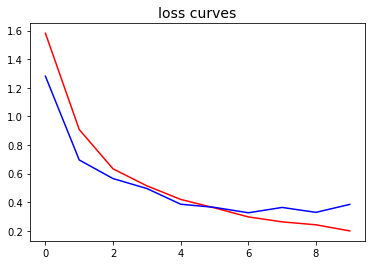

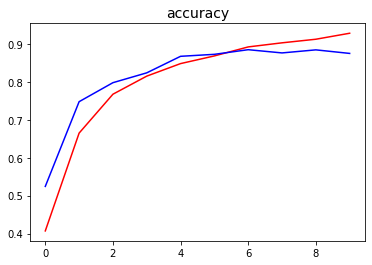

In [12]:
plot_loss_accuracy_curves(model2)

In [13]:
#Evaluate our model
model2.evaluate(validdata)

144/144 [==============================] - 11s 73ms/step - loss: 0.3844 - accuracy: 0.8752


[0.3844486176967621, 0.8752453923225403]

**Observation:**
Model2 performs well with non-augmented data.Let's try it on augmented data and check the performance

Step4. Create a model and name it model3 which'll be trained using augmented training data



In [14]:
traindata_aug_gen=ImageDataGenerator(rescale=1/255.,
                                    rotation_range=20,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True
                                     )

In [15]:
train_aug_data=traindata_aug_gen.flow_from_directory('Toma/train',
                                                     target_size=(256,256),
                                                     class_mode="categorical",
                                                     batch_size=32)

Found 18345 images belonging to 10 classes.


In [16]:
model3=tf.keras.models.clone_model(model2)
model3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
model3.fit(train_aug_data,epochs=20,steps_per_epoch=len(train_aug_data),
           validation_data=validdata,
           validation_steps=len(validdata),callbacks=[early_stop])

Epoch 1/20
574/574 [==============================] - 269s 468ms/step - loss: 1.9559 - accuracy: 0.2437 - val_loss: 1.6818 - val_accuracy: 0.4072
Epoch 2/20
574/574 [==============================] - 268s 467ms/step - loss: 1.2951 - accuracy: 0.5217 - val_loss: 1.5039 - val_accuracy: 0.5339
Epoch 3/20
574/574 [==============================] - 276s 481ms/step - loss: 0.8587 - accuracy: 0.6891 - val_loss: 0.6692 - val_accuracy: 0.7653
Epoch 4/20
574/574 [==============================] - 267s 465ms/step - loss: 0.6395 - accuracy: 0.7646 - val_loss: 0.7724 - val_accuracy: 0.7433
Epoch 5/20
574/574 [==============================] - 266s 463ms/step - loss: 0.5005 - accuracy: 0.8173 - val_loss: 0.7549 - val_accuracy: 0.7594
Epoch 6/20
574/574 [==============================] - 264s 459ms/step - loss: 0.4178 - accuracy: 0.8528 - val_loss: 0.3041 - val_accuracy: 0.8901
Epoch 7/20
574/574 [==============================] - 266s 463ms/step - loss: 0.3664 - accuracy: 0.8680 - val_loss: 0.4588 -

In [17]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                    

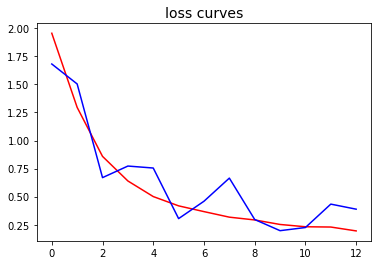

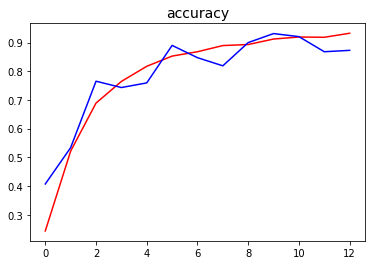

In [18]:
plot_loss_accuracy_curves(model3)

Evaluation of validation data on `model3`

In [19]:
model3.evaluate(validdata)

144/144 [==============================] - 11s 75ms/step - loss: 0.3881 - accuracy: 0.8728


[0.3880528509616852, 0.872846245765686]

Evaluation of validation data on `model2`

In [20]:
model2.evaluate(validdata)

144/144 [==============================] - 11s 74ms/step - loss: 0.3844 - accuracy: 0.8752


[0.38444867730140686, 0.8752453923225403]

In [38]:
model2.save("model2_Tomato.h5")
model3.save("model3_Tomato.h5")

**Observation:**

As per the above observation `model3` and `model2` both  performs well on validation data.

where `model3` gave an accuracy: 87.3%

where `model2` gave an accuracy: 87.5%

Save the models and copy it to gdrive

In [39]:
shutil.copy("model2_Tomato.h5",'/gdrive/MyDrive')

'/gdrive/MyDrive/model2_Tomato.h5'

In [41]:
shutil.copy("model3_Tomato.h5",'/gdrive/MyDrive')

'/gdrive/MyDrive/model3_Tomato.h5'

In [23]:
def load_and_prep_data(path):
  img=tf.io.read_file(path)
  #decode the image into tensor
  tensor=tf.io.decode_image(img,channels=3)

  image=tf.image.resize(tensor,[256,256])
  #normalize the image
  image=image/255.

  #we need to expand the first axis beacuse of batch size
  image=tf.expand_dims(image,axis=0)
  #(1,256,256,3) 

  return image

In [8]:
class_keys=list(traindata.class_indices.keys())

In [34]:
def visualize_random_class(model):
  plt.figure(figsize=(6,5))
  class_name=np.random.choice(os.listdir("Tomato/valid"))
  image_name=np.random.choice(os.listdir(os.path.join("Tomato/valid",class_name)))
  img=load_and_prep_data(os.path.join("Tomato/valid",class_name,image_name))
  pred=model.predict(img)
  plt.imshow(tf.squeeze(img))
  index=tf.argmax(pred[0])
  confidence=pred[0][index]
  color="red"
  if(class_name == class_keys[index]):color="green"
  plt.title(class_keys[index]+f"\n\n Confidence: {confidence*100:.2f}%",color=color,fontsize=13)



def predict_and_visualize(model):
  plt.figure(figsize=(20,35))
  for i,j in enumerate(os.listdir("/content/Toma/test")):
    plt.subplot(5,5,i+1)

    # call the preprocessing function load_and_prep_data() method to preprocess the image into tensors
    pro_image=load_and_prep_data(os.path.join("/content/Toma/test",j))
  
    #predict using given model
    pred=model.predict(pro_image)

    #get the index of the max probability that is returned from softmax activation function
    index=tf.argmax(pred[0])

    #calculate the confidence
    confidence=pred[0][index]*100

    #plot the image with title
    plt.imshow(tf.squeeze(pro_image))
    plt.title(class_keys[index]+f"\n\n Confidence:{confidence:.2f}%",fontsize=13)
    plt.xlabel("True class: "+j,fontsize=12)

Predicting test image data on `model2`

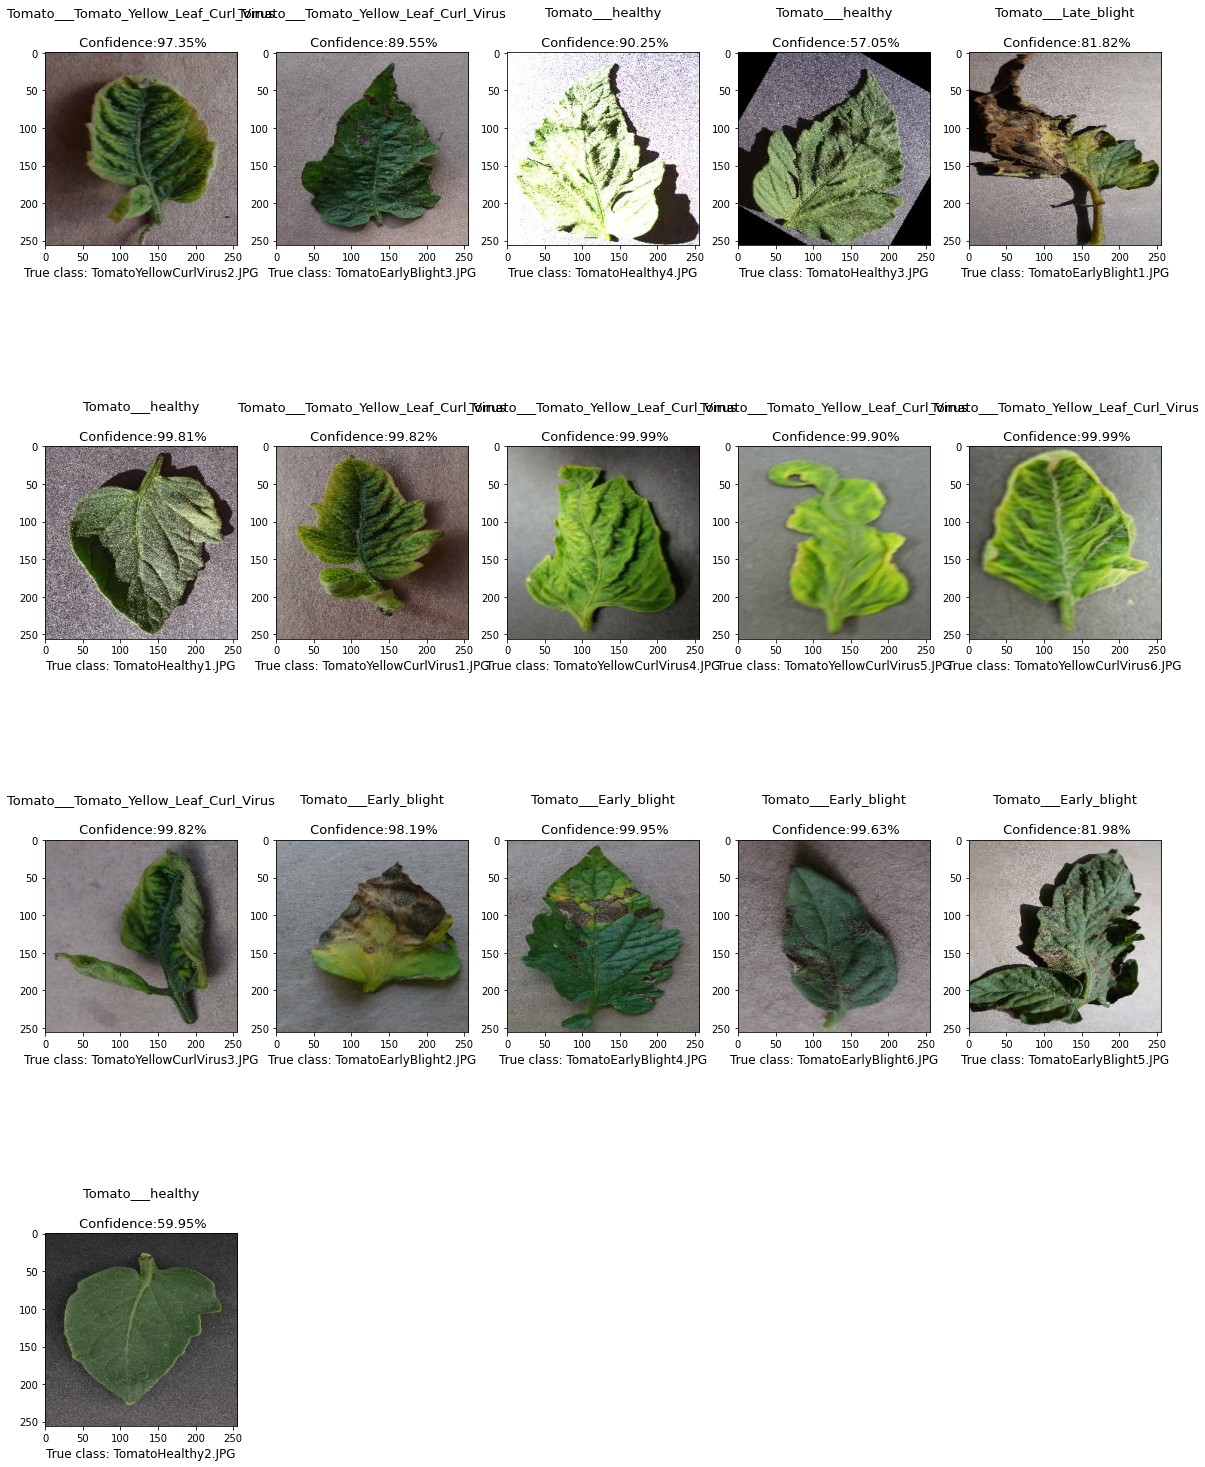

In [37]:
predict_and_visualize(model2)

Predicting test image data on `model3`

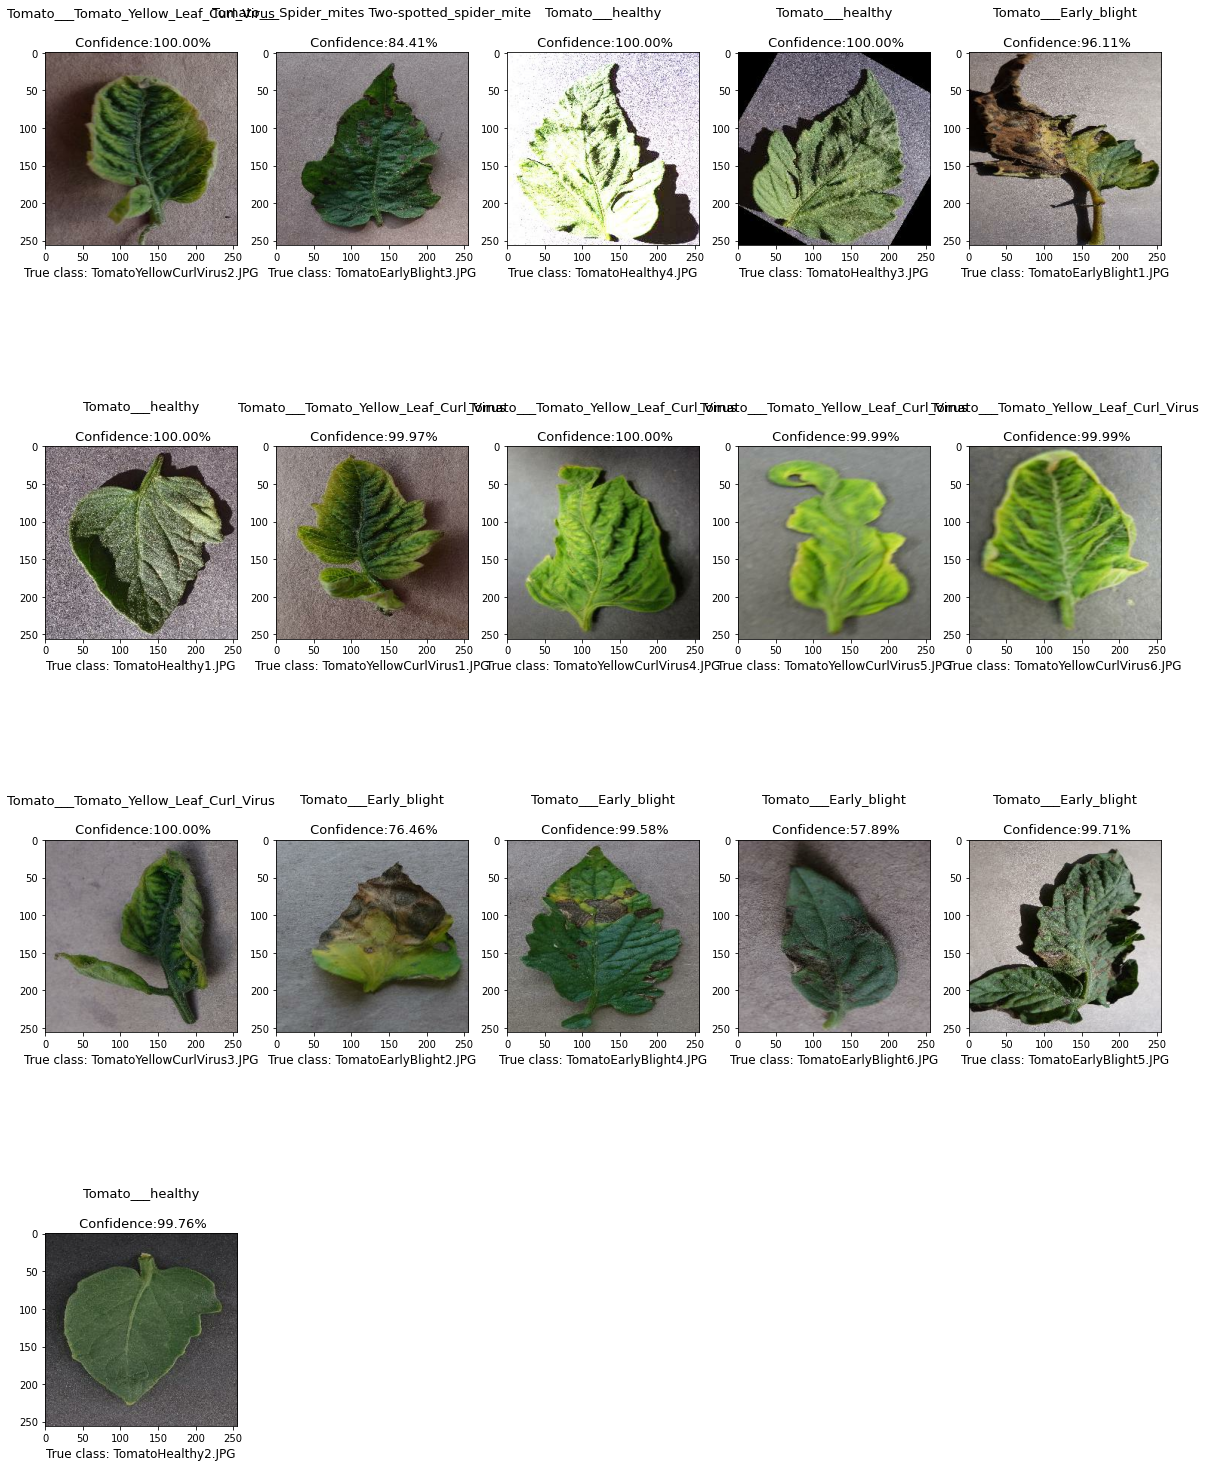

In [36]:
predict_and_visualize(model3)

On test data `model3` perfofrms well than `model2`
but as per the curves `val_loss` and `val_accuracy` `model3`
has a noisy `validation` tha `model2`.

Making a fucntion to print the confusion_matrix for our models

In [72]:
from sklearn.metrics import confusion_matrix
def confusion_matrix_model(model):
  plt.figure(figsize=(15,12))
  y_test=[]
  y_pred=[]
  for i in range(1000):
    class_fol=np.random.choice(os.listdir('Toma/valid'))
    y_test.append(class_fol)
    image_name=np.random.choice(os.listdir(os.path.join('Toma/valid',class_fol)))
    pro_image=load_and_prep_data(os.path.join("Toma/valid",class_fol,image_name))
    pred=model.predict(pro_image)
    index=tf.argmax(pred[0])
    y_pred.append(class_keys[index])
  sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap=plt.cm.Blues,cbar=False,annot_kws={"size": 16})
  plt.xticks(labels=class_keys,ticks=range(0,len(class_keys)),rotation=90)
  plt.yticks(labels=class_keys,ticks=range(0,len(class_keys)),rotation=360)
  plt.title("Confusion Matrix",fontsize=18,color="darkblue")

In [50]:
model3=tf.keras.models.load_model("/gdrive/MyDrive/model3_Tomato.h5")

###Confusion Matrix for `model3`

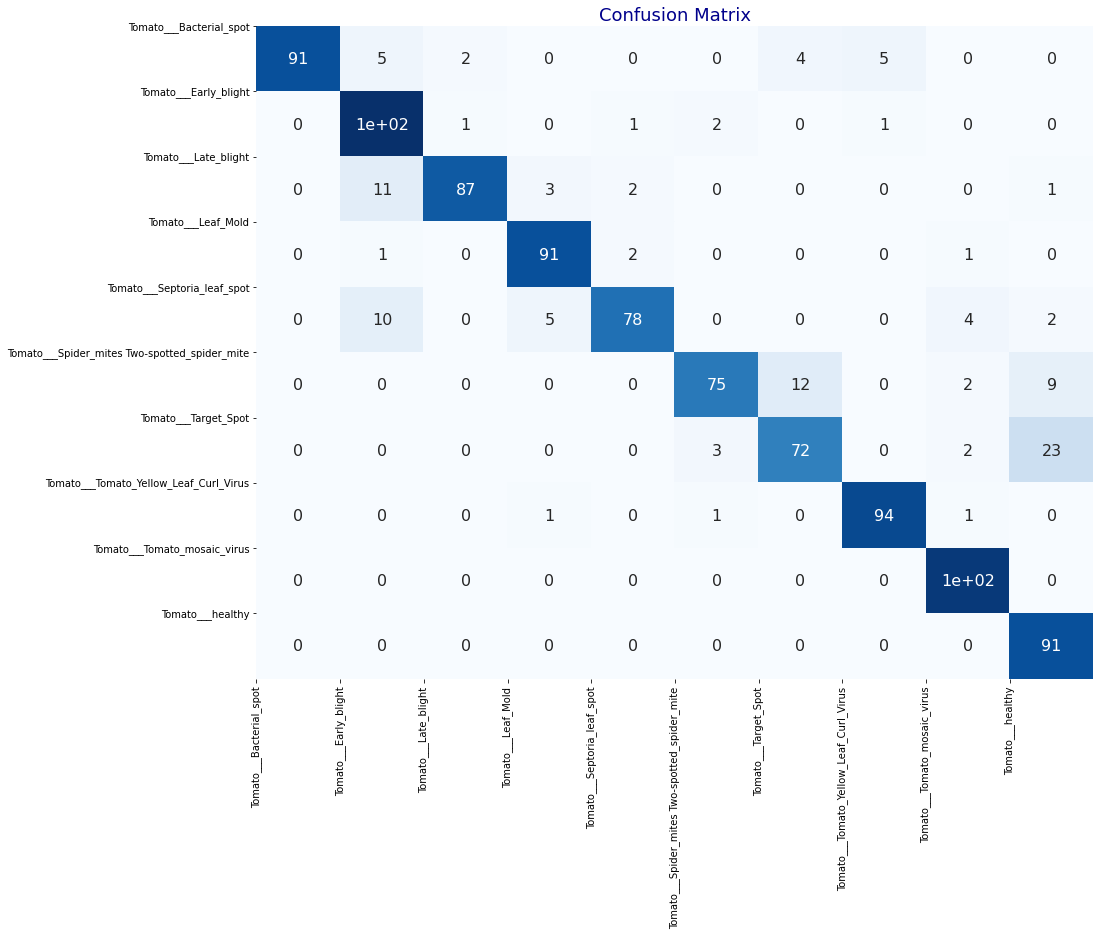

In [73]:
confusion_matrix_model(model3)

###Confusion Matrix for `model2`

In [74]:
model2=tf.keras.models.load_model("/gdrive/MyDrive/model2_Tomato.h5")

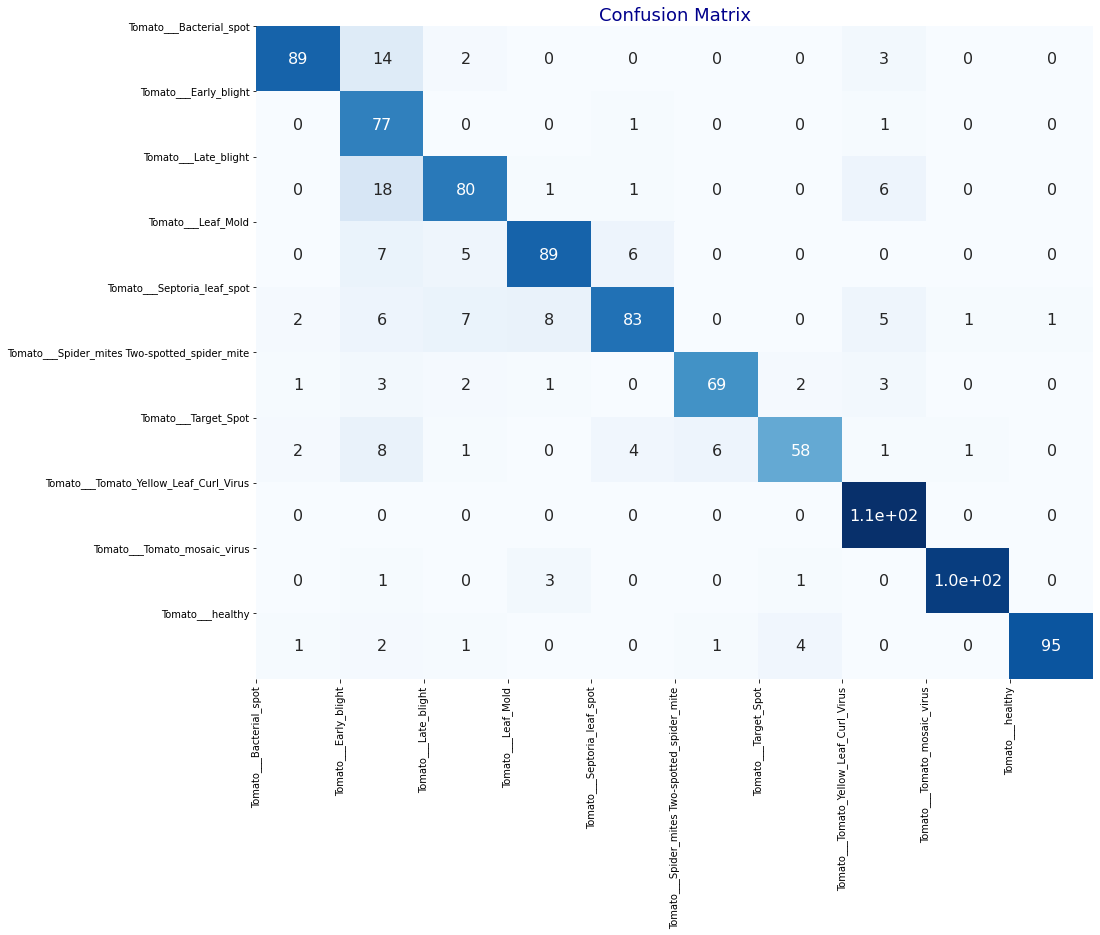

In [75]:
confusion_matrix_model(model2)